In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('Flight_Price.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


## Observations:-
Firstly, we explore the flight price dataset

### Features of dataset

Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.

Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.

Source: This column holds the name of the place from where the passenger’s journey will start.

Destination: This column holds the name of the place to where passengers wanted to travel.

Arrival_Time: Arrival time is when the passenger will reach his/her destination.

Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.

Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.

Price: Price of the flight for a complete journey including all the expenses before onboarding.


In [46]:
df.shape

(10683, 9)

### We have 10683 rows and 9 columns

In [47]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [48]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

### only one null value present in total_stops column

In [49]:
df.dropna(inplace=True)

In [50]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10682 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 834.5+ KB


### Most of the columns are having object type values , we will use encoding techniques to handle this situation

In [52]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Price              1870
dtype: int64

In [53]:
# let's check duplicates rows present or not in this dataset
duplicate_rows=df[df.duplicated()]
print(duplicate_rows)

           Airline Date_of_Journey    Source Destination Dep_Time  \
683    Jet Airways       1/06/2019     Delhi      Cochin    14:35   
1061     Air India      21/05/2019     Delhi      Cochin    22:00   
1348     Air India      18/05/2019     Delhi      Cochin    17:15   
1418   Jet Airways       6/06/2019     Delhi      Cochin    05:30   
1674        IndiGo      24/03/2019  Banglore   New Delhi    18:25   
...            ...             ...       ...         ...      ...   
10594  Jet Airways      27/06/2019     Delhi      Cochin    23:05   
10616  Jet Airways       1/06/2019     Delhi      Cochin    09:40   
10634  Jet Airways       6/06/2019     Delhi      Cochin    09:40   
10672  Jet Airways      27/06/2019     Delhi      Cochin    23:05   
10673  Jet Airways      27/05/2019     Delhi      Cochin    13:25   

       Arrival_Time Duration Total_Stops  Price  
683    04:25 02 Jun  13h 50m     2 stops  13376  
1061   19:15 22 May  21h 15m     2 stops  10231  
1348   19:15 19 May  

### There are 220 duplicate values present in our dataset

In [54]:
print(f"rows and columns before dropping duplicates",df.shape)
df.drop_duplicates(inplace=True)
print(f"rows and columns after dropping duplicates",df.shape)

rows and columns before dropping duplicates (10682, 9)
rows and columns after dropping duplicates (10462, 9)


In [55]:
print("persentage loss after dropping duplicate values",220/10683*100)

persentage loss after dropping duplicate values 2.059346625479734


In [56]:
#let's convert the date column
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day']= df['Date_of_Journey'].apply(lambda dt:dt.day)
df['Month']= df['Date_of_Journey'].apply(lambda dt:dt.month)


In [57]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1


In [58]:
df.drop(columns=['Date_of_Journey'],inplace=True)

In [59]:
#let's convert Dep_time column
df['Dep_hour']= pd.to_datetime(df['Dep_Time']).apply(lambda dt:dt.hour)
df['Dep_min']= pd.to_datetime(df['Dep_Time']).apply(lambda dt:dt.minute)
# let's convert Arrival_time column

df['Arrival_hour']= pd.to_datetime(df['Arrival_Time']).apply(lambda dt:dt.hour)
df['Arrival_min']= pd.to_datetime(df['Arrival_Time']).apply(lambda dt:dt.minute)


In [60]:
df['Destination']= df['Destination'].replace('Delhi','New Delhi')

In [61]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [62]:
df.dtypes

Airline         object
Source          object
Destination     object
Dep_Time        object
Arrival_Time    object
Duration         int64
Total_Stops     object
Price            int64
Day              int64
Month            int64
Dep_hour         int64
Dep_min          int64
Arrival_hour     int64
Arrival_min      int64
dtype: object

In [63]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,445,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1 stop,13302,3,1,16,50,21,35


In [64]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [65]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,3,1,16,50,21,35


## EDA

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Airline'>

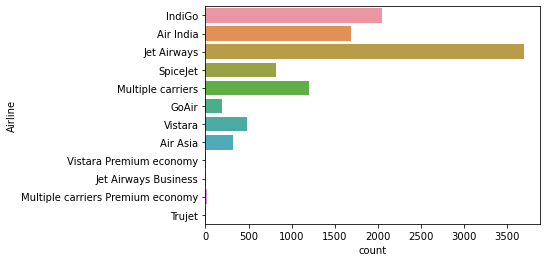

In [66]:
print(df['Airline'].value_counts())
sns.countplot(y='Airline',data=df)

### Observations: 
### Now from the above graph we can see that between the type of airline and count of flights we can see that Jet Airways has the most flight boarded.



Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Source'>

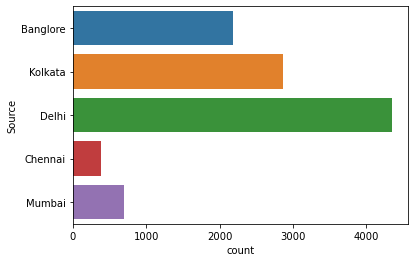

In [67]:
print(df['Source'].value_counts())
sns.countplot(y='Source',data=df)

### Observations: 
### Here in the above graph we have plotted the count plot for Source vs several flights and got to see that Delhi has the most number of flights while Chennai has the least no. of flights.


Cochin       4345
Banglore     2860
New Delhi    2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Destination'>

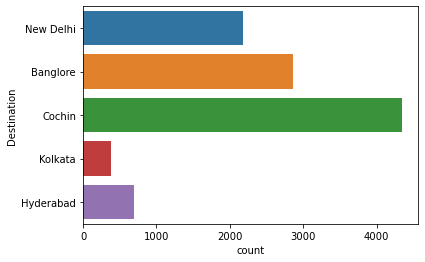

In [68]:
print(df['Destination'].value_counts())
sns.countplot(y='Destination',data=df)

### Observations: 
### Here in the above graph we have plotted the count plot for Destination vs several flights and got to see that Cochin has the most number of flights while Kolkata has the least no. of flights.


1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Total_Stops'>

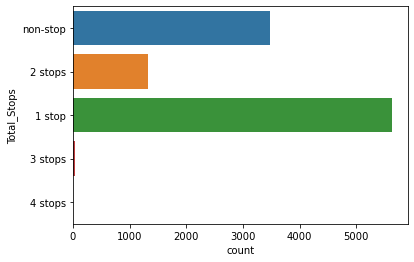

In [69]:
print(df['Total_Stops'].value_counts())
sns.countplot(y='Total_Stops',data=df)

### Observations: 
### Here in the above graph we have plotted the count plot for Total_Stops vs several flights and got to see that 1 stop has the most number of flights 


6     2465
3     2169
5     2025
9     1375
1     1058
12     946
4      424
Name: Month, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Month'>

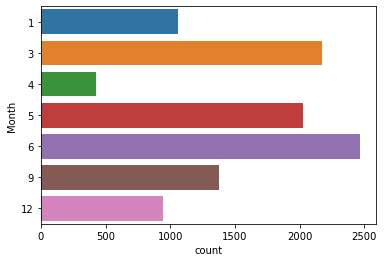

In [70]:
print(df['Month'].value_counts())
sns.countplot(y='Month',data=df)

### Observations: 
### Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that June month has the most number of flights.



<AxesSubplot:xlabel='Price', ylabel='Density'>

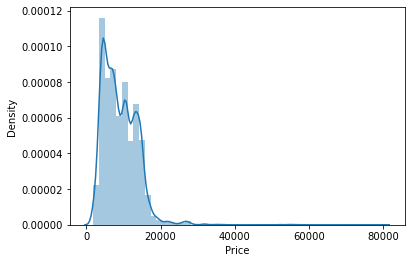

In [71]:
sns.distplot(df['Price'])

### Plotting Catplot for Price vs Destination



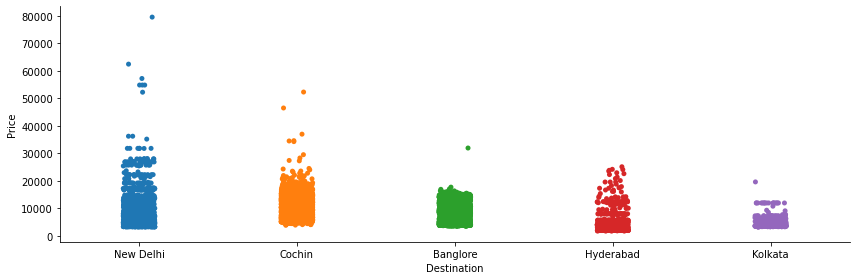

In [72]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), height = 4, aspect = 3)
plt.show()


### Plotting Catplot for Price vs Source



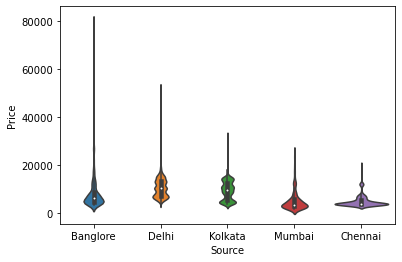

In [73]:
sns.violinplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), height = 4, aspect = 3)
plt.show()


### Plotting Catplot for Price vs Month


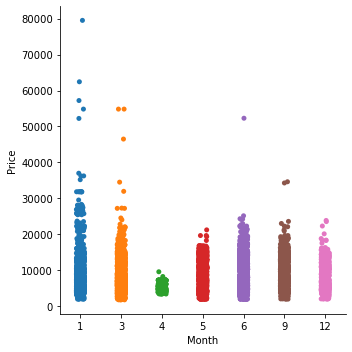

In [74]:
sns.catplot(y = "Price", x = "Month", data = df)
plt.show()


### Plotting Price vs Airline plot



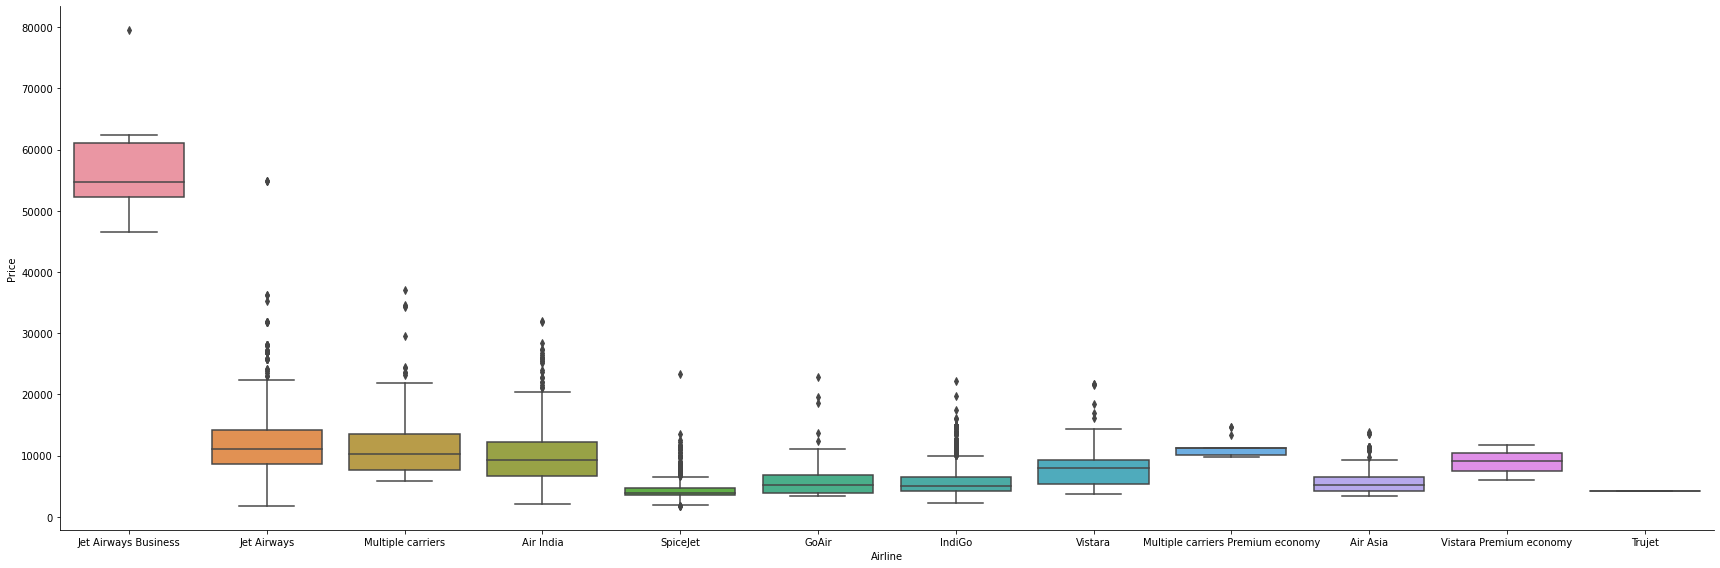

In [75]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="box", height = 8, aspect = 3)
plt.show()

### Observations: 
### Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways Business has the highest price range.



In [128]:
# converting text into numbers using label encoder
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [129]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,4,170,4,3897,24,3,22,20,1,10
1,1,3,0,445,1,7662,5,1,5,50,13,15
2,4,2,1,1140,1,13882,6,9,9,25,4,25
3,3,3,0,325,0,6218,5,12,18,5,23,30
4,3,0,4,285,0,13302,3,1,16,50,21,35


In [130]:
# stats about data
df.describe()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.740967,1.953642,1.490920,629.781591,1.463105,9026.790289,12.630090,5.534601,12.478494,24.404989,13.387689,24.719939
std,2.030360,1.186327,1.455803,500.699045,1.821371,4624.849541,8.791635,2.995344,5.727227,18.815719,6.855547,16.570450
min,0.000000,0.000000,0.000000,5.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,170.000000,0.000000,5224.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,505.000000,0.000000,8266.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,910.000000,4.000000,12344.750000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,10.000000,4.000000,4.000000,2860.000000,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


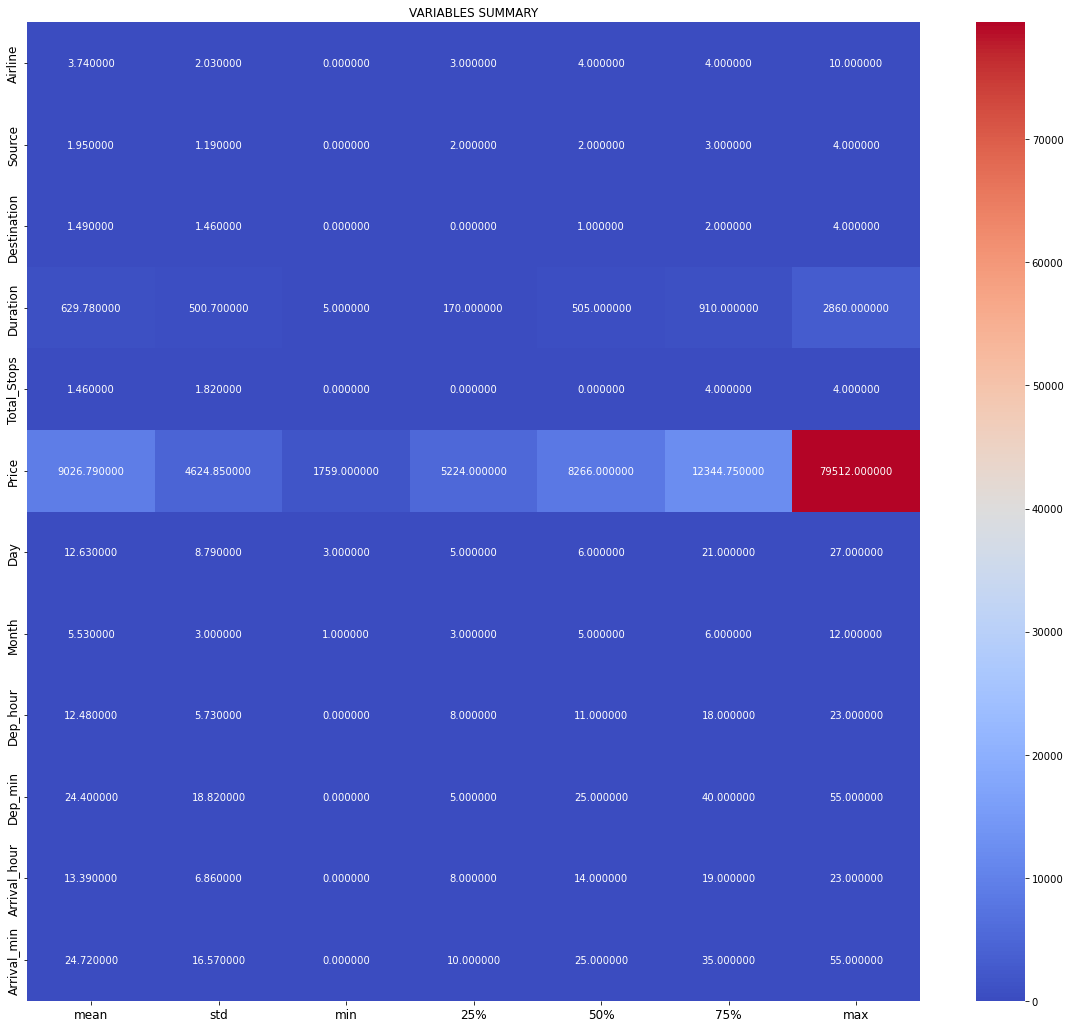

In [131]:
df.describe()
plt.figure(figsize=(20,18))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("VARIABLES SUMMARY")
plt.show()

In [132]:
df.shape

(10462, 12)

## Normal Distribution curve for every individual column


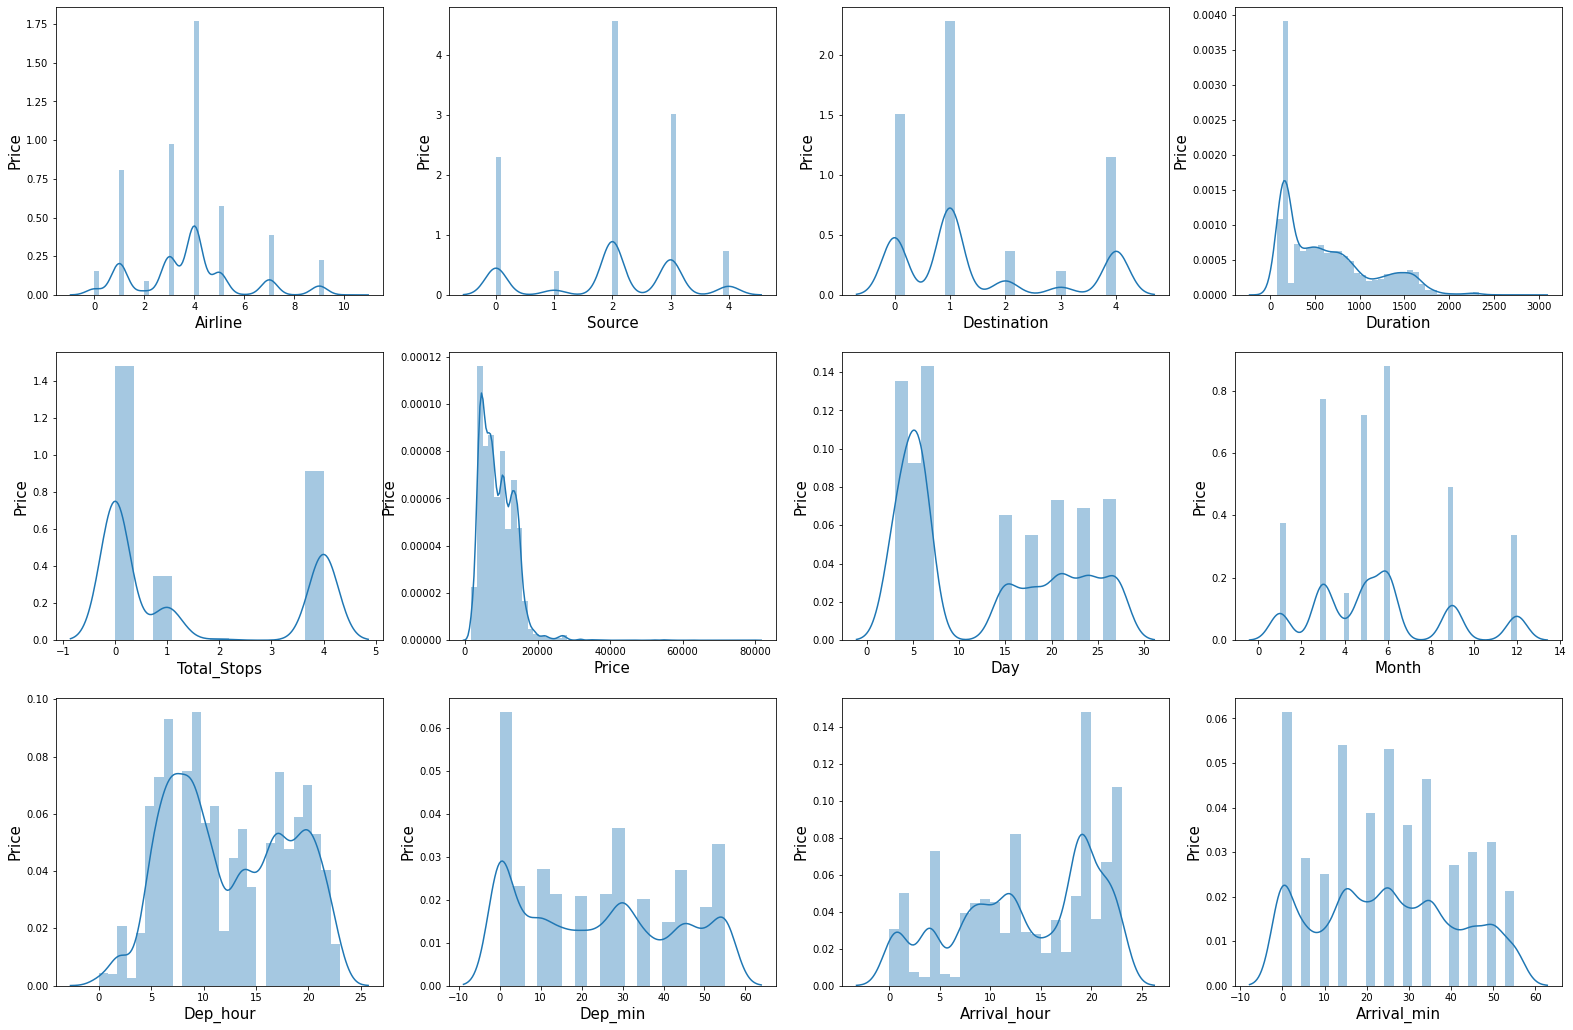

In [133]:
# let's visualize the data using distribution plot
plt.figure(figsize=(27,18))
pn = 1
for col in df:
    if pn <= 12:
        ax = plt.subplot(3,4,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('Price',fontsize = 15)
    pn +=1
plt.show()    

### Airline,Source,Duration features are indicating the presence of outliers.


## Checking Outliers

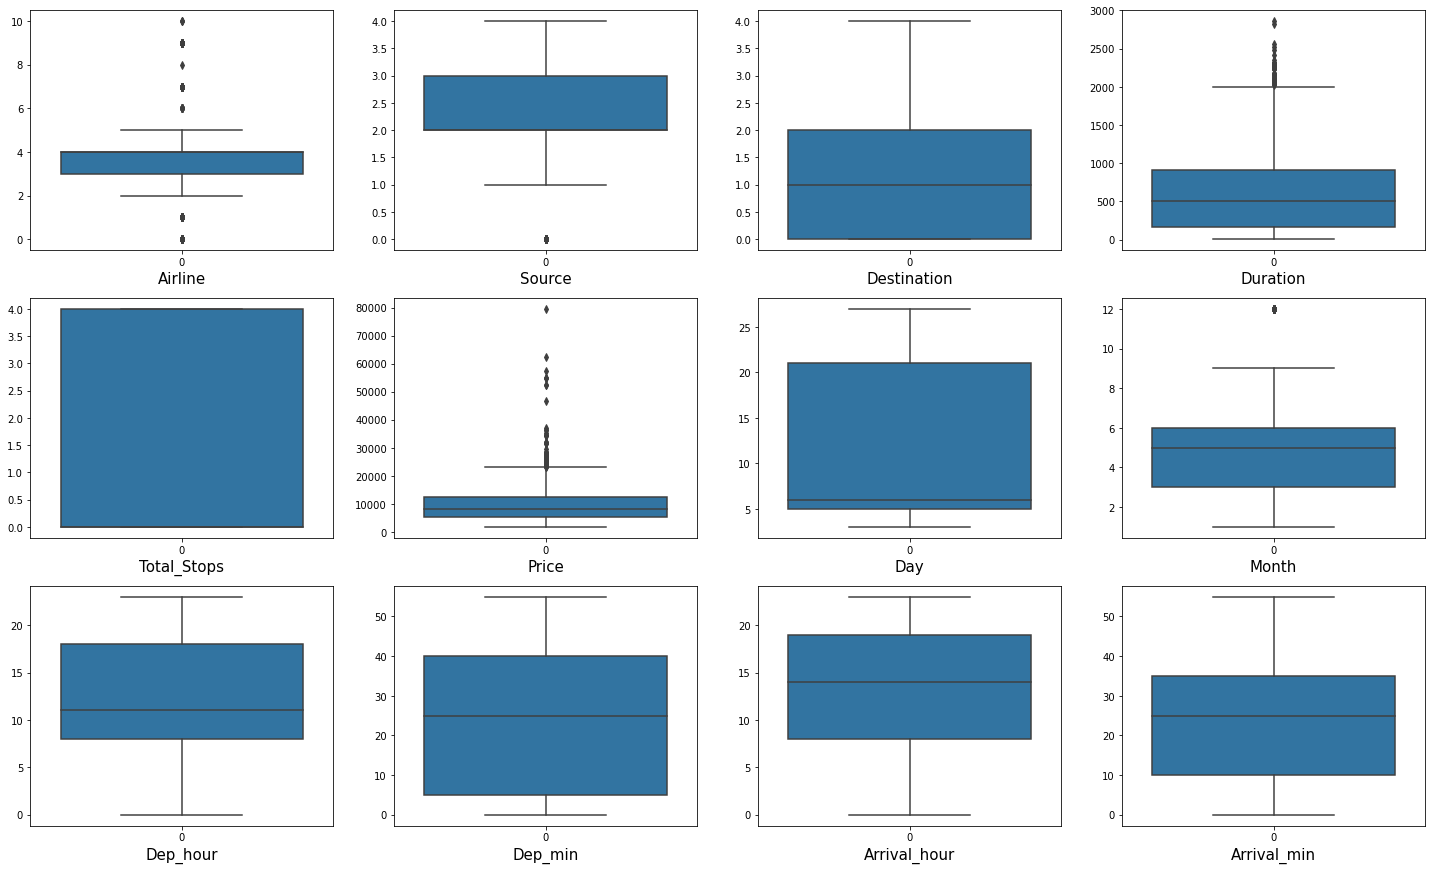

In [134]:
plt.figure(figsize=(25,15))
pn = 1
for col in df:
    if pn <= 12:
        ax = plt.subplot(3,4,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

### as per my observation, Airline,Source,Duration,Price features are indicating the presence of outliers. we will remove the outliers by using zscore technique 

## Removing Outliers


In [135]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (10462, 12)
Shape of the dataframe after removing outliers:  (10303, 12)
Percentage of data loss post outlier removal:  1.5197858917988911


## Correlation

In [136]:
df.corr()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.012559,0.029744,-0.129055,0.036462,-0.024423,0.026380,-0.004869,-0.021043,-0.060311,-0.005574,-0.070664
Source,-0.012559,1.000000,-0.831856,0.172147,-0.233615,0.074149,-0.003433,0.045461,0.061346,-0.049819,0.027822,0.020306
Destination,0.029744,-0.831856,1.000000,-0.366021,0.503420,-0.274705,-0.014203,-0.062701,-0.063951,0.089744,-0.051615,0.046906
Duration,-0.129055,0.172147,-0.366021,1.000000,-0.629429,0.572323,-0.044803,0.066202,0.021781,-0.020710,0.051053,-0.075223
Total_Stops,0.036462,-0.233615,0.503420,-0.629429,1.000000,-0.625949,0.039710,-0.064064,0.039244,0.053889,-0.101399,0.177675
Price,-0.024423,0.074149,-0.274705,0.572323,-0.625949,1.000000,-0.147886,0.069470,0.009726,-0.054740,0.043518,-0.101521
Day,0.026380,-0.003433,-0.014203,-0.044803,0.039710,-0.147886,1.000000,-0.279951,-0.009068,-0.010592,-0.001950,-0.020024
Month,-0.004869,0.045461,-0.062701,0.066202,-0.064064,0.069470,-0.279951,1.000000,0.027456,0.009124,-0.002841,-0.023963
Dep_hour,-0.021043,0.061346,-0.063951,0.021781,0.039244,0.009726,-0.009068,0.027456,1.000000,-0.017468,0.003938,0.073478
Dep_min,-0.060311,-0.049819,0.089744,-0.020710,0.053889,-0.054740,-0.010592,0.009124,-0.017468,1.000000,0.049042,-0.021603


In [137]:
# let's check the correation with Price
df.corr()['Price'].sort_values()


Total_Stops    -0.625949
Destination    -0.274705
Day            -0.147886
Arrival_min    -0.101521
Dep_min        -0.054740
Airline        -0.024423
Dep_hour        0.009726
Arrival_hour    0.043518
Month           0.069470
Source          0.074149
Duration        0.572323
Price           1.000000
Name: Price, dtype: float64

### Checking correlation with Price


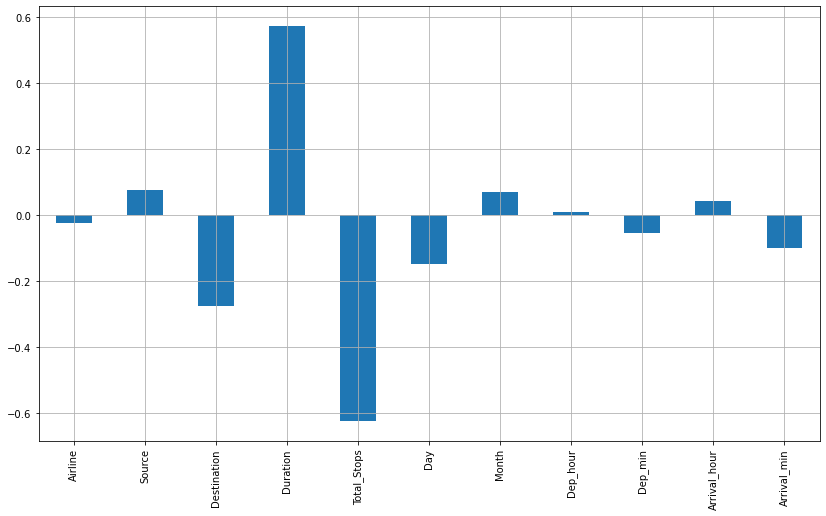

In [138]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

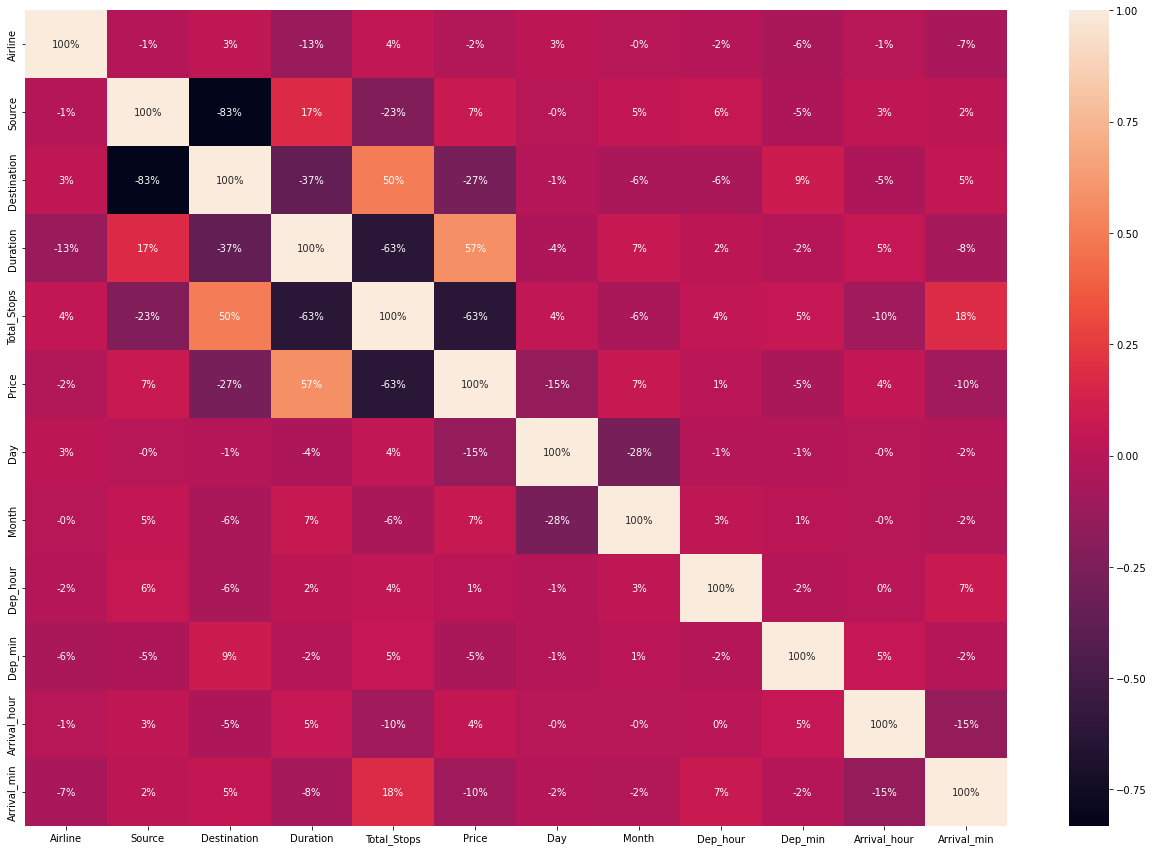

In [139]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

## Obserrvations:-
- Airline,Destination,Total_Stops,Day,Dep_min,Arrival_min are negatively correlated with target.
- Source,Duration,Dep_hour,Arrival_hour are positively correlated with target variable
- There is no multicollinearity problem exist in  this dataset. 
- maximum correlation : Duration
- minimum correlation : Arrival_hour                             
                                  

## Skewness

In [140]:
df.skew()

Airline         0.542295
Source         -0.433358
Destination     0.817041
Duration        0.818823
Total_Stops     0.601423
Price           0.442750
Day             0.363047
Month           0.635281
Dep_hour        0.099166
Dep_min         0.175992
Arrival_hour   -0.372139
Arrival_min     0.107500
dtype: float64

## Dividing data in features and label

In [141]:
x = df.drop('Price',axis = 1)
x.head()

,Airline,Source,Destination,Duration,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,4,170,4,24,3,22,20,1,10
1,1,3,0,445,1,5,1,5,50,13,15
2,4,2,1,1140,1,6,9,9,25,4,25
3,3,3,0,325,0,5,12,18,5,23,30
4,3,0,4,285,0,3,1,16,50,21,35


In [142]:
y=df['Price']

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [143]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,-0.288423,-1.602852,1.454846,-1.038198,1.284195,1.179210,-0.838366,1.555657,0.029216,-1.793055,-0.769136
1,-1.456143,0.885776,-1.333405,-0.015740,0.363271,-0.836691,-1.914052,-1.366162,1.180882,-0.059706,-0.427356
2,0.206136,-0.026586,-0.029302,1.094911,0.363271,-0.613473,1.131572,-0.560128,0.261339,-1.366070,0.158237
3,-0.288423,0.885776,-1.333405,-0.361807,-0.889653,-0.836691,1.842742,0.956878,-0.927172,1.412702,0.419955
4,-0.288423,-1.602852,1.454846,-0.502894,-0.889653,-1.430300,-1.914052,0.643238,1.180882,1.117037,0.667064
5,1.498028,0.885776,-1.333405,-1.196782,1.284195,1.179210,0.277553,-0.560128,-1.573598,-0.352042,0.158237
6,0.206136,-1.602852,1.454846,0.844709,-0.889653,-1.430300,1.842742,0.956878,1.335015,-0.497857,0.158237
7,0.206136,-1.602852,1.454846,1.224939,-0.889653,-1.430300,-1.914052,-0.750600,-1.573598,-1.222374,-1.173549
8,0.206136,-1.602852,1.454846,1.466492,-0.889653,-1.430300,1.842742,-0.750600,1.335015,-0.497857,0.158237
9,0.663611,-0.026586,-0.029302,0.045693,-0.889653,1.334517,-0.055291,-0.195669,0.261339,0.821906,-0.427356


In [144]:
pd.DataFrame(x).skew().sort_values()

Dep_min        -0.357733
Arrival_hour   -0.356669
Arrival_min    -0.350817
Source         -0.242718
Dep_hour       -0.106647
Duration       -0.040895
Month          -0.024069
Airline        -0.008994
Day             0.015133
Destination     0.040977
Total_Stops     0.341664
dtype: float64

### Every value will be reduced after transformation

In [145]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-0.28842348, -1.60285201,  1.45484594, ...,  0.02921632,
        -1.79305528, -0.76913553],
       [-1.45614285,  0.88577596, -1.33340475, ...,  1.18088244,
        -0.05970568, -0.4273557 ],
       [ 0.20613638, -0.02658646, -0.0293024 , ...,  0.26133901,
        -1.36606991,  0.1582367 ],
       ...,
       [ 0.20613638, -1.60285201,  1.45484594, ...,  0.02921632,
        -0.35204182, -0.12207637],
       [ 2.25463769, -1.60285201,  1.45484594, ...,  0.47217306,
         0.08678135, -0.76913553],
       [-1.45614285, -0.02658646, -0.0293024 , ...,  1.33501477,
         0.82190557, -0.4273557 ]])

## Final features Multi-Collinearity Check using VIF**


In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Airline,1.054102
1,Source,2.586958
2,Destination,3.102127
3,Duration,2.249326
4,Total_Stops,2.202935
5,Day,1.040558
6,Month,1.042735
7,Dep_hour,1.025643
8,Dep_min,1.017597
9,Arrival_hour,1.052904


### There is no sign of Multi-collinearity

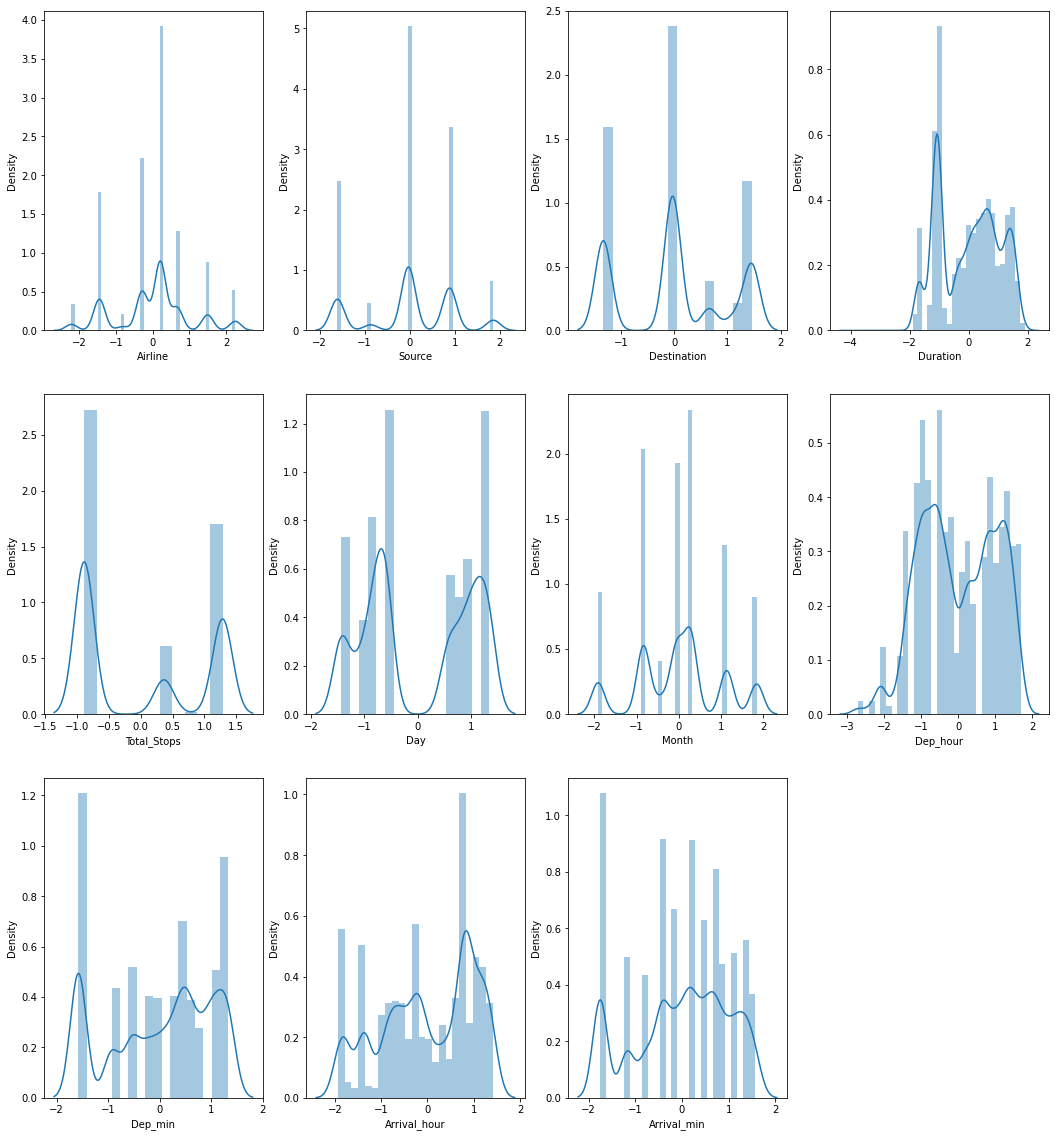

In [147]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(3,4,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally. Now ,our model is ready for model building


# Model selection/predictions


## Regression because our Target variable 'Price' is continuous.


### Finding the best Random state and maximum accuracy

In [148]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [158]:
maxAccu=0
maxRS=0

for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train, Y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8261642374927352 on Random State 103


**Splitting the data into Training and Testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=302)

**I am defining a function for splitting of the Training and Testing features alongwith Target, then it trains the model soon after training it predicts the Target and calculates RMSE score with R2 score alongwith this it calculates the Cross Validation score and finally it finds the difference between the R2 score and Cross Validation score.**

In [162]:
# Regression Model Function

def reg(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=302)
    
    #Training the model
    model.fit(X_train, Y_train)
    
    #Predicting Y_test
    pred = model.predict(X_test)
    
    #RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    #R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #CV Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Difference
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

## Linear Regression

In [152]:
#Linear regression
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 2795.0525341568023
R2 Score is: 51.824878347233806
Cross Validation Score: 47.74464039784047
R2 Score - Cross Validation Score is 4.080237949393336


**Ridge Regression**

In [155]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 2796.623707564723
R2 Score is: 51.770702088838874
Cross Validation Score: 47.740909811393706
R2 Score - Cross Validation Score is 4.029792277445168


## Decision Tree Regressor


In [159]:
# Decision Tree Regressor
model=DecisionTreeRegressor(criterion="poisson", random_state=151)
reg(model, x, y)

RMSE Score is: 2642.182127735422
R2 Score is: 57.9784886714877
Cross Validation Score: 55.71491143430756
R2 Score - Cross Validation Score is 2.2635772371801437


## Random Forest Regressor

In [161]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 2741.2182075310966
R2 Score is: 55.90142572968628
Cross Validation Score: 54.10765668601771
R2 Score - Cross Validation Score is 1.7937690436685685


## KNeighbors Regressor

In [163]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model,x,y)

RMSE Score is: 2739.3474662858384
R2 Score is: 55.56785714114343
Cross Validation Score: 54.13478006469244
R2 Score - Cross Validation Score is 1.433077076450985


## Support Vector Regression


In [164]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x, y)

RMSE Score is: 3961.3447791719123
R2 Score is: 7.084471906687129
Cross Validation Score: 6.965928140791544
R2 Score - Cross Validation Score is 0.11854376589558502


### According to scores  K Neighbors Regressoris best fitted model





# Hyperparameter Tuning of Final model


In [165]:
params= {'algorithm':['ball_tree', 'kd_tree', 'brute'],
                      'leaf_size':[20,30,40,50],
                      'n_neighbors':[3,5,7,9,11,13]}

In [166]:
grid_knn = GridSearchCV(estimator=knn,param_grid=params)

In [167]:
grid_knn.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [168]:
grid_knn.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_neighbors': 5}

In [169]:
knn = KNeighborsRegressor(algorithm='ball_tree',leaf_size=20,n_neighbors=7)

In [170]:
knn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_neighbors=7)

In [172]:
y_pred = knn.predict(X_test)

In [173]:
print("Score Post Hyperparameter Tuning is======",r2_score(Y_test,y_pred))

Score Post Hyperparameter Tuning is====== 0.7062464215777071


# save the final model


In [174]:
import joblib
joblib.dump(knn,'flight Price.pkl')

['flight Price.pkl']